# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_df=pd.merge(study_results,mouse_metadata,on="Mouse ID")

# Display the data table for preview
data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mice_count=len(data_df["Mouse ID"].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates=data_df.duplicated(subset=["Mouse ID","Timepoint"],keep=False)
duplicate_rows = data_df[duplicates]
duplicate_ids=duplicate_rows["Mouse ID"].unique()
duplicate_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_ids_df=data_df[data_df["Mouse ID"].isin(duplicate_ids)]
duplicate_ids_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df=data_df[~data_df["Mouse ID"].isin(duplicate_ids)]
cleaned_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
final_mouse_count=len(cleaned_data_df["Mouse ID"].unique())
final_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
index=cleaned_data_df["Drug Regimen"].unique()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume=cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume=cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor_volume=cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stddev_tumor_volume=cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_volume = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_df=pd.DataFrame({"Mean Tumor Volume":mean_tumor_volume,
                         "Median Tumor Volume":median_tumor_volume,
                         "Tumor Volume Variance":variance_tumor_volume,
                         "Tunmor Volume Std.Dev":stddev_tumor_volume,
                         "Tumor Volume Std.Err.":sem_tumor_volume})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tunmor Volume Std.Dev,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

aggregate_summary_df = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
aggregate_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouser Timepoints'>

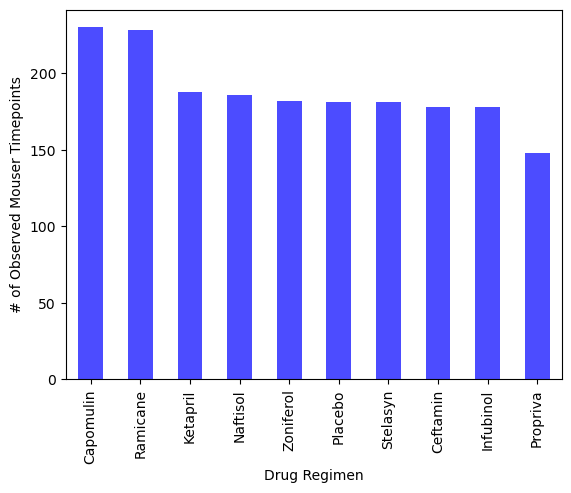

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_count=cleaned_data_df.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)
timepoint_count.plot(kind="bar",ylabel="# of Observed Mouser Timepoints",color="blue",alpha=0.7,width=0.5)

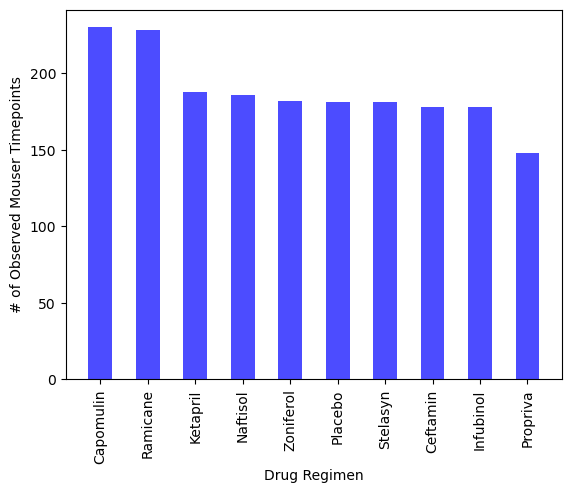

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoint_count=cleaned_data_df.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)
x_axis=timepoint_count.index
y_axis=timepoint_count.values
plt.bar(x_axis,y_axis,color="b",alpha=0.7,width=0.5,align="center")
plt.xticks(rotation="vertical") 
plt.ylabel("# of Observed Mouser Timepoints")
plt.xlabel("Drug Regimen")
plt.show()

<Axes: ylabel='Sex'>

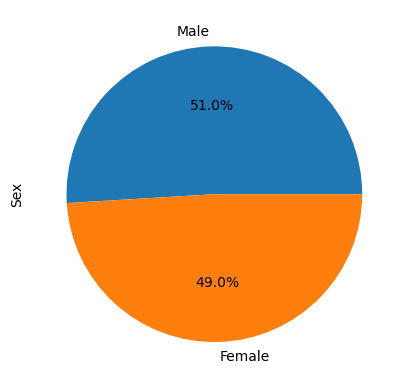

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count=cleaned_data_df["Sex"].value_counts()
sex_count.plot(kind="pie",autopct="%1.1f%%",startangle=0,ylabel="Sex")


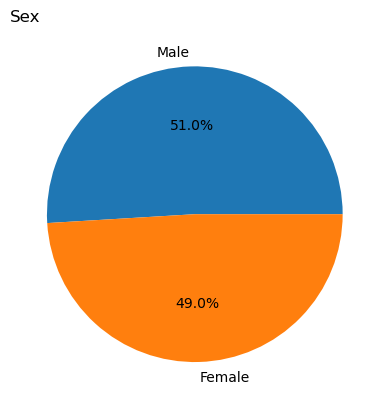

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%')
plt.title("Sex",loc="left")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = cleaned_data_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoints, cleaned_data_df, on=["Mouse ID", "Timepoint"])
filtered_final_tumor_volume = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]),
                                                   ["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]]
filtered_final_tumor_volume = filtered_final_tumor_volume.rename(columns={"Tumor Volume (mm3)": "Final Tumor Volume (mm3)"})


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=filtered_final_tumor_volume["Drug Regimen"].unique().tolist()
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data=[]
for treatment in treatment_list:
    treatment_data=filtered_final_tumor_volume[filtered_final_tumor_volume["Drug Regimen"]==treatment]
    for volume in treatment_data["Final Tumor Volume (mm3)"]:
        tumor_volume_data.append(volume)
# Create a dataseries from the existing data frame. There is no need to create two separately lists as above 
shortened_tumor_vol_versus_treatment_series = filtered_final_tumor_volume.groupby("Drug Regimen")["Final Tumor Volume (mm3)"]
shortened_tumor_vol_versus_treatment_df=filtered_final_tumor_volume[["Drug Regimen","Final Tumor Volume (mm3)"]]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Q1 = shortened_tumor_vol_versus_treatment_series .quantile(0.25)
Q3 = shortened_tumor_vol_versus_treatment_series.quantile(0.75)
IQR = Q3 - Q1  
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"The IQRs are {IQR}")
print(f" The lower bounds and upper bounds are {lower_bound} {upper_bound}")
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 

    
    # Determine outliers using upper and lower bounds
bound_df=pd.DataFrame({"Lower Bound":lower_bound,"Upper Bound":upper_bound})
filtered_final_tumor_volume_merged=filtered_final_tumor_volume.join(bound_df,on="Drug Regimen")
outliers = filtered_final_tumor_volume_merged[
    (filtered_final_tumor_volume_merged["Final Tumor Volume (mm3)"] < filtered_final_tumor_volume_merged["Lower Bound"]) |
    (filtered_final_tumor_volume_merged["Final Tumor Volume (mm3)"] > filtered_final_tumor_volume_merged["Upper Bound"])
]

outliers

The IQRs are Drug Regimen
Capomulin     7.781863
Ceftamin     15.577752
Infubinol    11.477135
Ramicane      9.098537
Name: Final Tumor Volume (mm3), dtype: float64
 The lower bounds and upper bounds are Drug Regimen
Capomulin    20.704562
Ceftamin     25.355450
Infubinol    36.832905
Ramicane     17.912664
Name: Final Tumor Volume (mm3), dtype: float64 Drug Regimen
Capomulin    51.832015
Ceftamin     87.666458
Infubinol    82.741446
Ramicane     54.306811
Name: Final Tumor Volume (mm3), dtype: float64


,Drug Regimen,Mouse ID,Final Tumor Volume (mm3),Lower Bound,Upper Bound
31,Infubinol,c326,36.321346,36.832905,82.741446


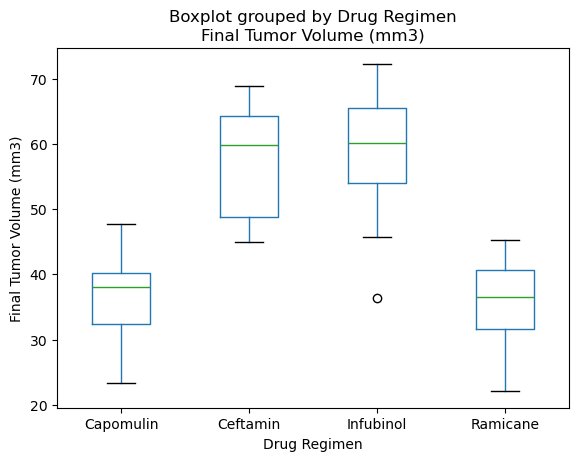

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
shortened_tumor_vol_versus_treatment_df.boxplot(by="Drug Regimen", column="Final Tumor Volume (mm3)", showfliers=True, grid=False)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

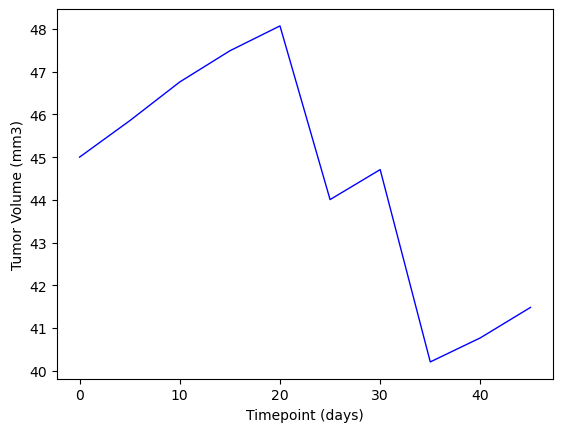

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
tumor_volume_Capomulin_l509=cleaned_data_df.loc[(cleaned_data_df["Drug Regimen"]=="Capomulin")&(cleaned_data_df["Mouse ID"]=="l509")]#use any mouse ID
x_axis=tumor_volume_Capomulin_l509["Timepoint"]
y_axis=tumor_volume_Capomulin_l509["Tumor Volume (mm3)"]
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis,y_axis,color="blue",linewidth=1)
plt.show()




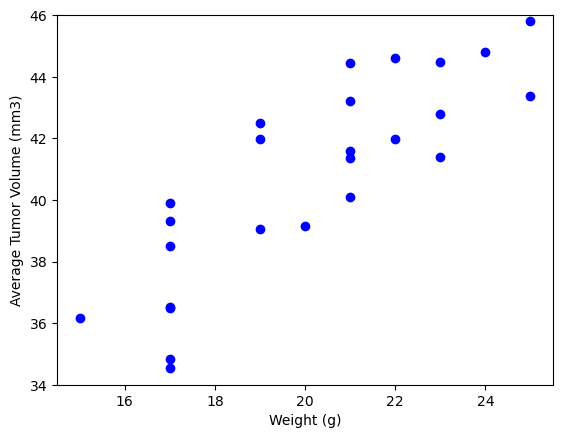

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df=cleaned_data_df.loc[cleaned_data_df["Drug Regimen"]=="Capomulin"]
length=capomulin_df["Mouse ID"].unique()
capomulin_avetumorvol=capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()
capomulin_avetumorvol=capomulin_avetumorvol.rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume (mm3)"})
cleaned_data_df_unique = cleaned_data_df[['Mouse ID', 'Weight (g)']].drop_duplicates()
capomulin_avetumorvol_weight=pd.merge(capomulin_avetumorvol,cleaned_data_df_unique,on="Mouse ID")    

x_axis=capomulin_avetumorvol_weight["Weight (g)"]
y_axis=capomulin_avetumorvol_weight["Average Tumor Volume (mm3)"]
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.ylim(34, 46)
plt.scatter(x_axis,y_axis,color="blue",marker="o")
plt.show()


## Correlation and Regression

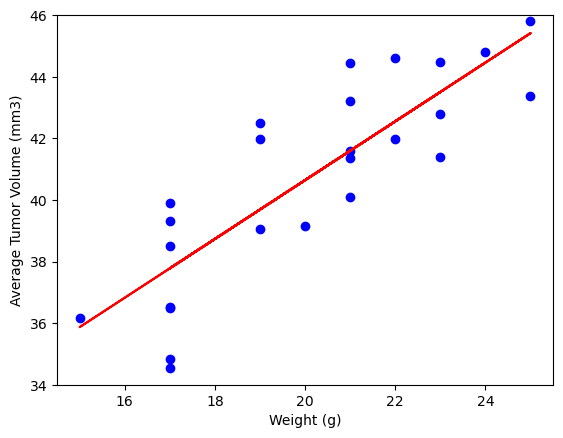

The correlation between mouse weight and the average tumor volume is 0.84


In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope, intercept, r_value, p_value, std_err = stats.linregress(x_axis, y_axis)
regression_line = slope * x_axis + intercept
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.ylim(34, 46)
plt.plot(x_axis,regression_line,color="red")
plt.scatter(x_axis,y_axis,color="blue",marker="o")
plt.show()
print(f"The correlation between mouse weight and the average tumor volume is {round(r_value,2)}")